In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

from cv_utils import get_grid_mask, verify_grid, find_corners_from_contour, crop_and_warp

In [22]:
path = '../data/train/image30.jpg'
image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

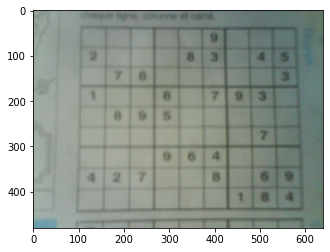

In [23]:
plt.imshow(image)

In [24]:
mask, h, v = get_grid_mask(image)

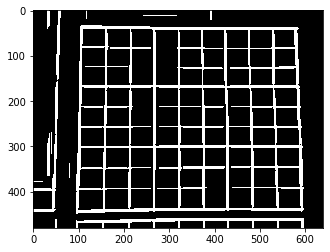

In [25]:
plt.imshow(mask, cmap='gray')

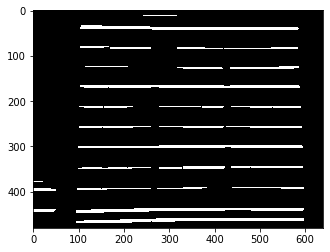

In [26]:
plt.imshow(h, cmap='gray')

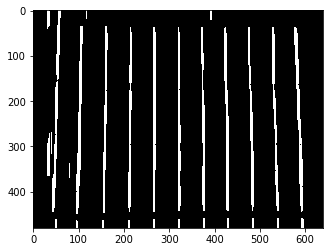

In [27]:
plt.imshow(v, cmap='gray')

In [28]:
# Find intersections between the lines to determine if the intersections are grid joints.
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
intersections = cv.bitwise_and(h, v)

In [29]:
sudoku_images = []
for grid_number, contour in enumerate(contours):

    # verify that Region of Interest (ROI) is a table
    rect = verify_grid(contour, intersections)
    if rect is None:
        continue

    corners = find_corners_from_contour(contour)
    new_image = crop_and_warp(image, corners)
    
    sudoku_images.append(new_image)

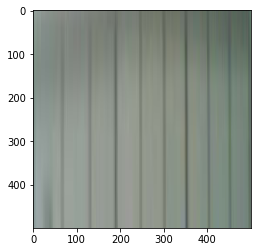

In [30]:
plt.imshow(sudoku_images[0])

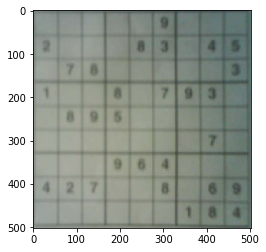

In [31]:
plt.imshow(sudoku_images[1])